## Deployment de modelo ensemble

In [130]:
import numpy as np
import pandas as pd
import tensorflow as tf
from joblib import load
from scipy.stats import norm
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [11]:
# Cargar los 4 modelos con mejores predicciones

best_dt = load("train_DecisionTreeClassifier(max_depth = 4, min_samples_split = 3, min_samples_leaf = 15).joblib")
best_svm = load("train_SVMClassifier(C = 1, kernel = 'rbf').joblib")
best_lr = load("train_LogisticRegressionClass(0.01, 10000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.05, 'lasso').joblib")
best_nb = load("train_NaiveBayesClassifier(X_train.drop(columns = ['Embarked_S', 'Lower_class'])).joblib")

In [184]:
# se utiliza test set
test = load("testdeploy.joblib")

In [185]:
#  valores reales de test set 
actual_values = load('predictiondeploy.joblib')

In [186]:
# definicion de funcion para calcular ejemplos individuales

def predict(i):
    
    x = test.iloc[i]
    y = actual_values.iloc[i]
    
    x = np.array(x).reshape(1,-1)
    
    prediction_dt = np.int(best_dt.predict(x))
    prediction_SVM = np.int(best_svm.predict(x))
    
    # naive bayes
    output_array_0 = []
    output_array_1 = []

    summary_0 = best_nb['likelihoods_0']
    summary_1 = best_nb['likelihoods_1']
 
    prob_class_1 = load('prob_1.joblib')
    prob_class_0 = load('prob_0.joblib')

    for i in range(0, summary_0.shape[0]):

        predictions_0 = norm(summary_0[i][0], summary_0[i][1]).cdf(x[0][i])
        predictions_1 = norm(summary_1[i][0], summary_1[i][1]).cdf(x[0][i])
        output_array_0.append(predictions_0)
        output_array_1.append(predictions_1)

    x_0_probabilities = np.array(output_array_0).T.squeeze()
    x_1_probabilities = np.array(output_array_1).T.squeeze()

    x_0 = np.append(x_0_probabilities, prob_class_0)
    x_1 = np.append(x_1_probabilities, prob_class_1)

    y_0 = np.prod(x_0)
    y_1 = np.prod(x_1)

    y_0_1 = np.append(y_0,y_1)

    prediction_nb = np.argmax(y_0_1)
    
    # logistic regression
    
    x_lr = np.append(1,x)
    logit = np.dot(x_lr, best_lr.squeeze())
    lr_probability =  1/(1 + np.exp(-logit))
    prediction_lr = np.int(round(lr_probability))
    
    predictions_array = [prediction_dt,prediction_SVM, prediction_lr, prediction_nb]
    
    labels_dict = {0:"died", 1:"survived"}
    
    prediction = np.int(mode(predictions_array)[0])
    
    print("prediction:",labels_dict.get(prediction))
    print("actual:", labels_dict.get(y))
    print("logistic regression probability:", lr_probability)
    print("Naive Bayes class 0:", y_0)
    print("Naive Bayes class 1:", y_1)

    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
    
    plot_tree(best_dt, feature_names = list(test.columns), filled = True, proportion = True)
    
    fig.savefig('decisiontree.png')
    
    return prediction

prediction: died
actual: survived
logistic regression probability: 0.2754008300467566
Naive Bayes class 0: 0.00012649726992892122
Naive Bayes class 1: 1.649221413027529e-05


0

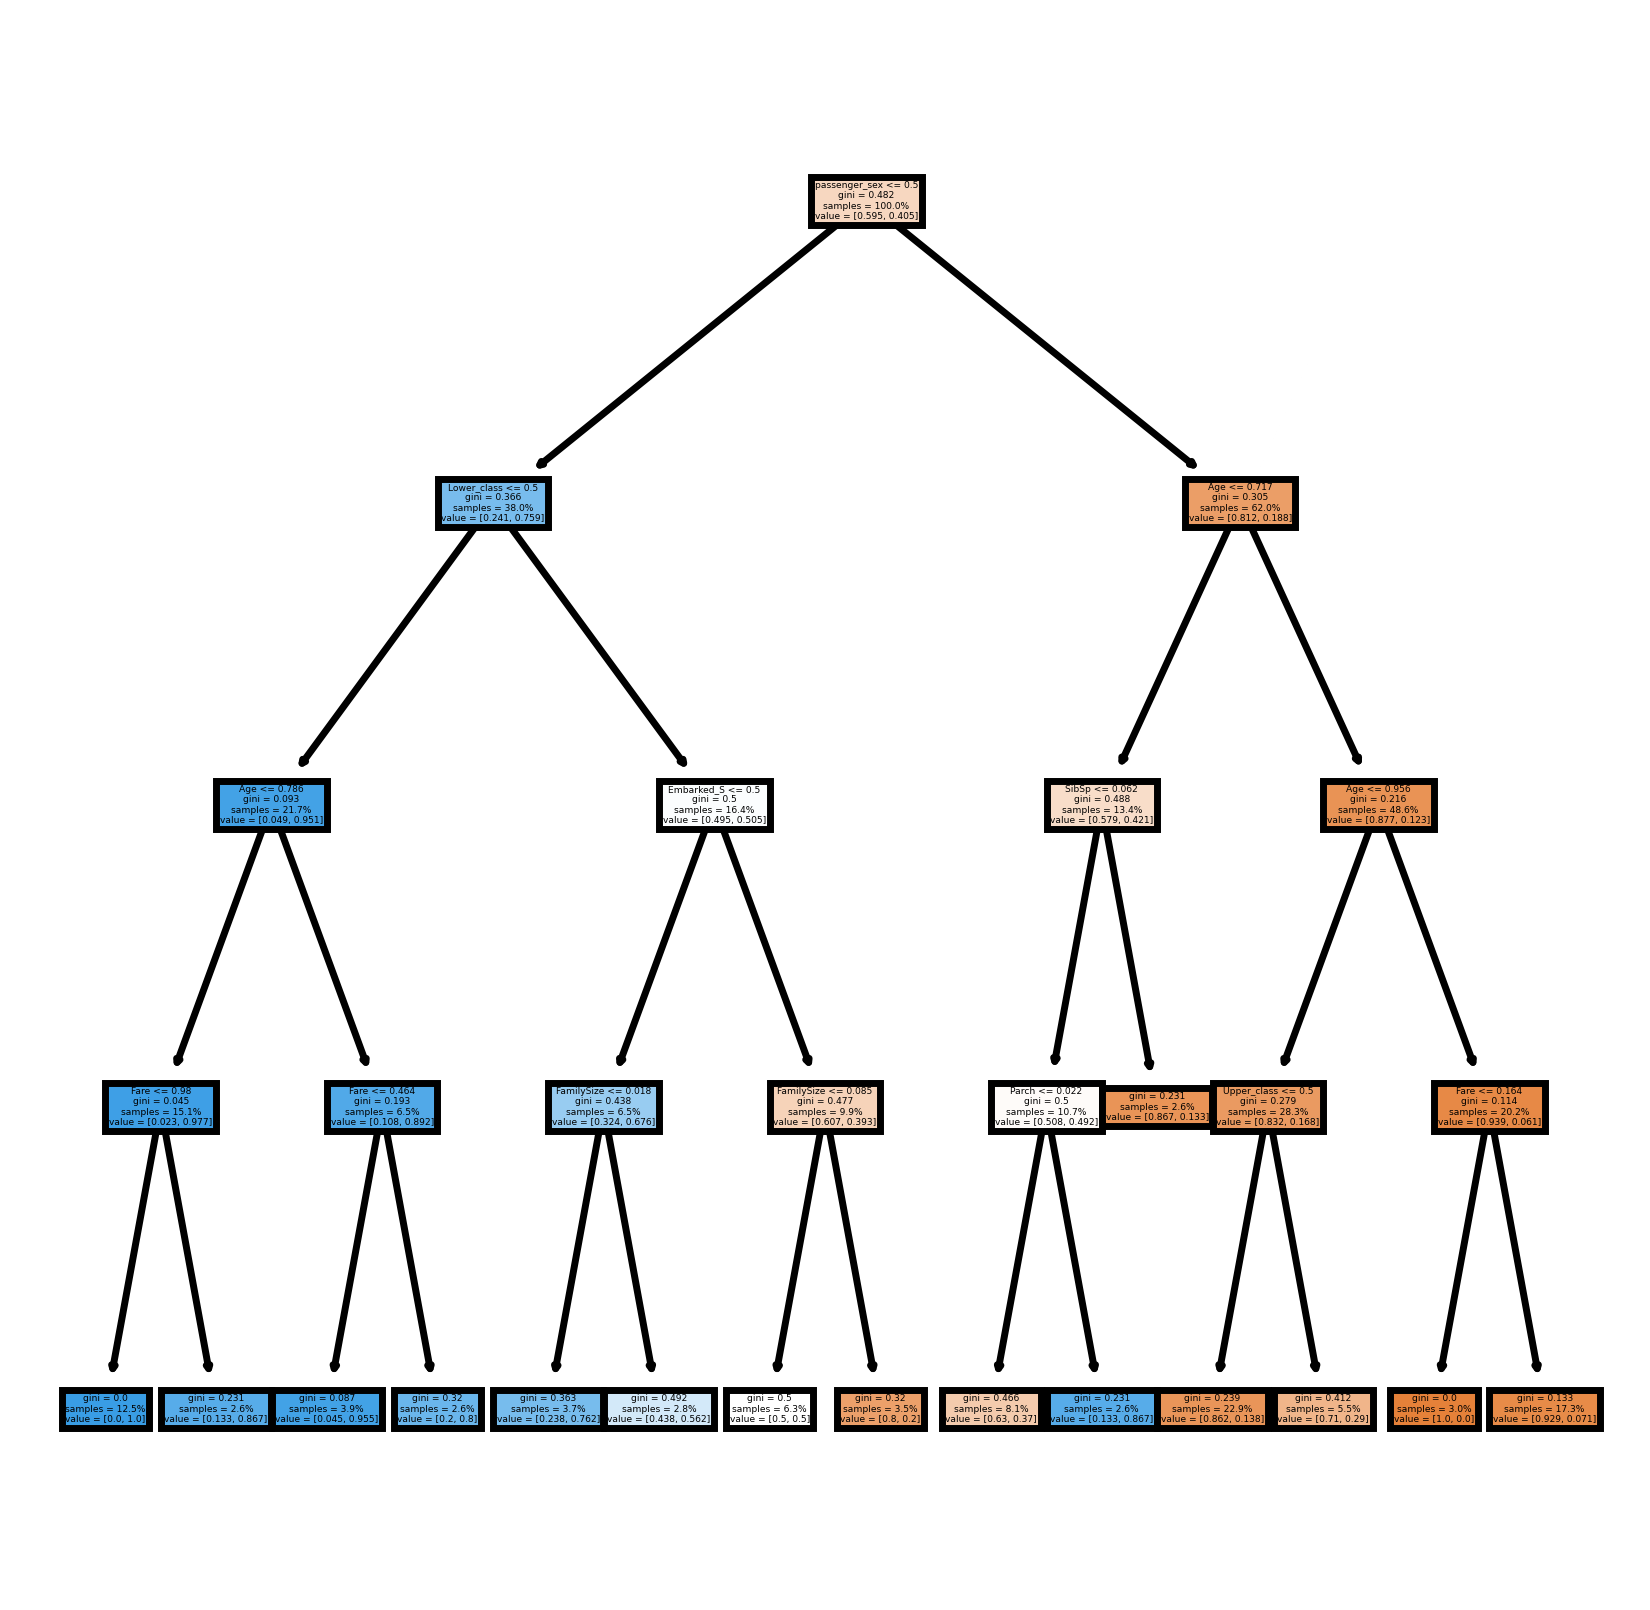

In [187]:
## Se utiliza el index del dataset de prueba para hacer las predicciones una por una.
# El arbol que se muestra tambien se guarde como una imagen para poder visualizarlo mejor.
predict(0)

prediction: died
actual: survived
logistic regression probability: 0.30583085879904265
Naive Bayes class 0: 6.602548935398819e-05
Naive Bayes class 1: 7.86479478582825e-05


0

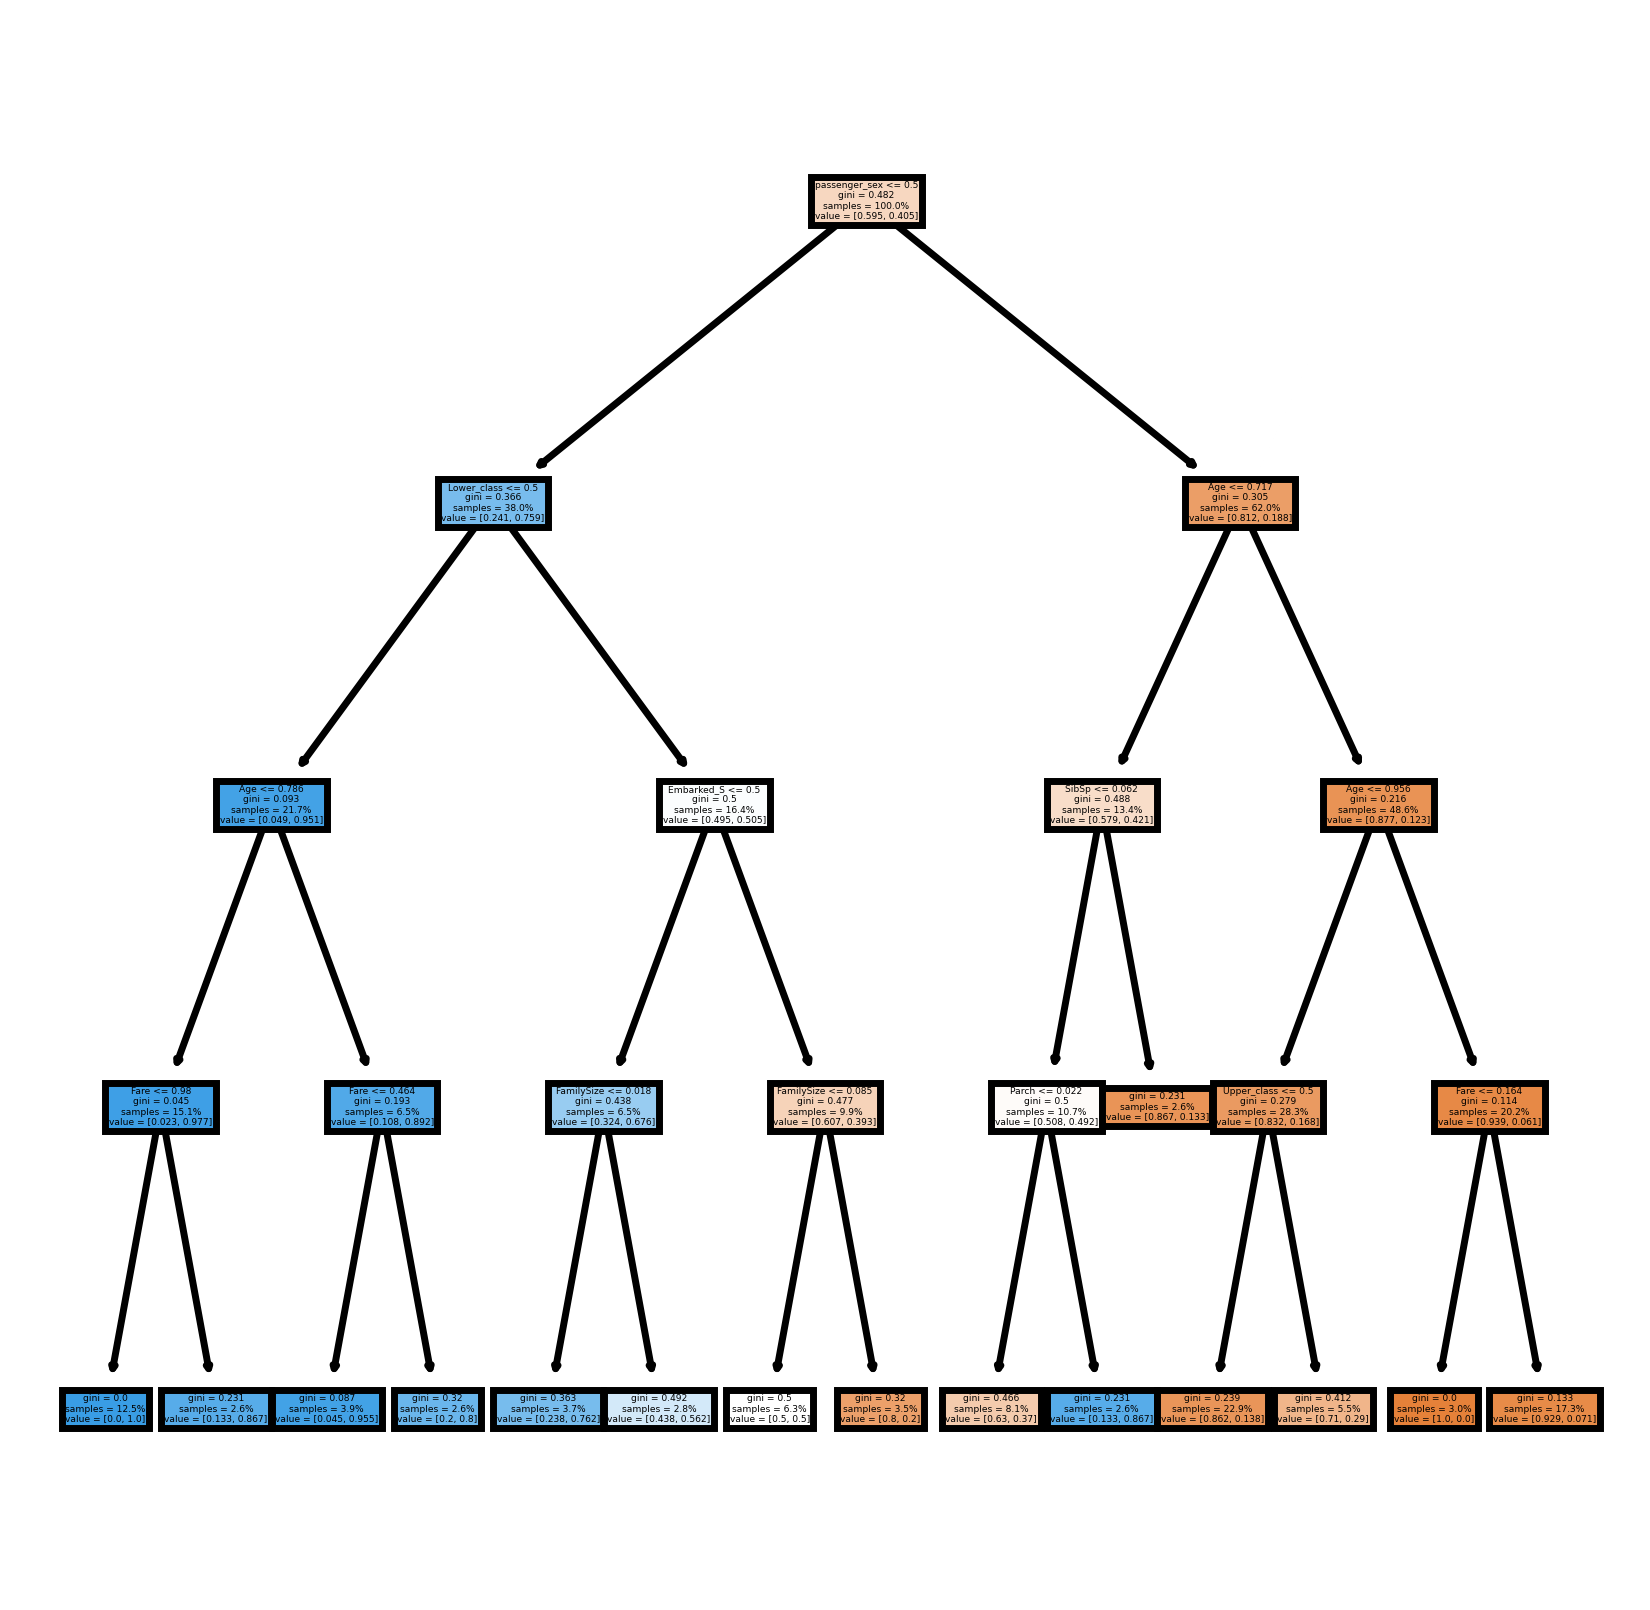

In [172]:
predict(5)

prediction: died
actual: died
logistic regression probability: 0.2776095599337911
Naive Bayes class 0: 0.00028324906312619287
Naive Bayes class 1: 0.00016081569685547285


0

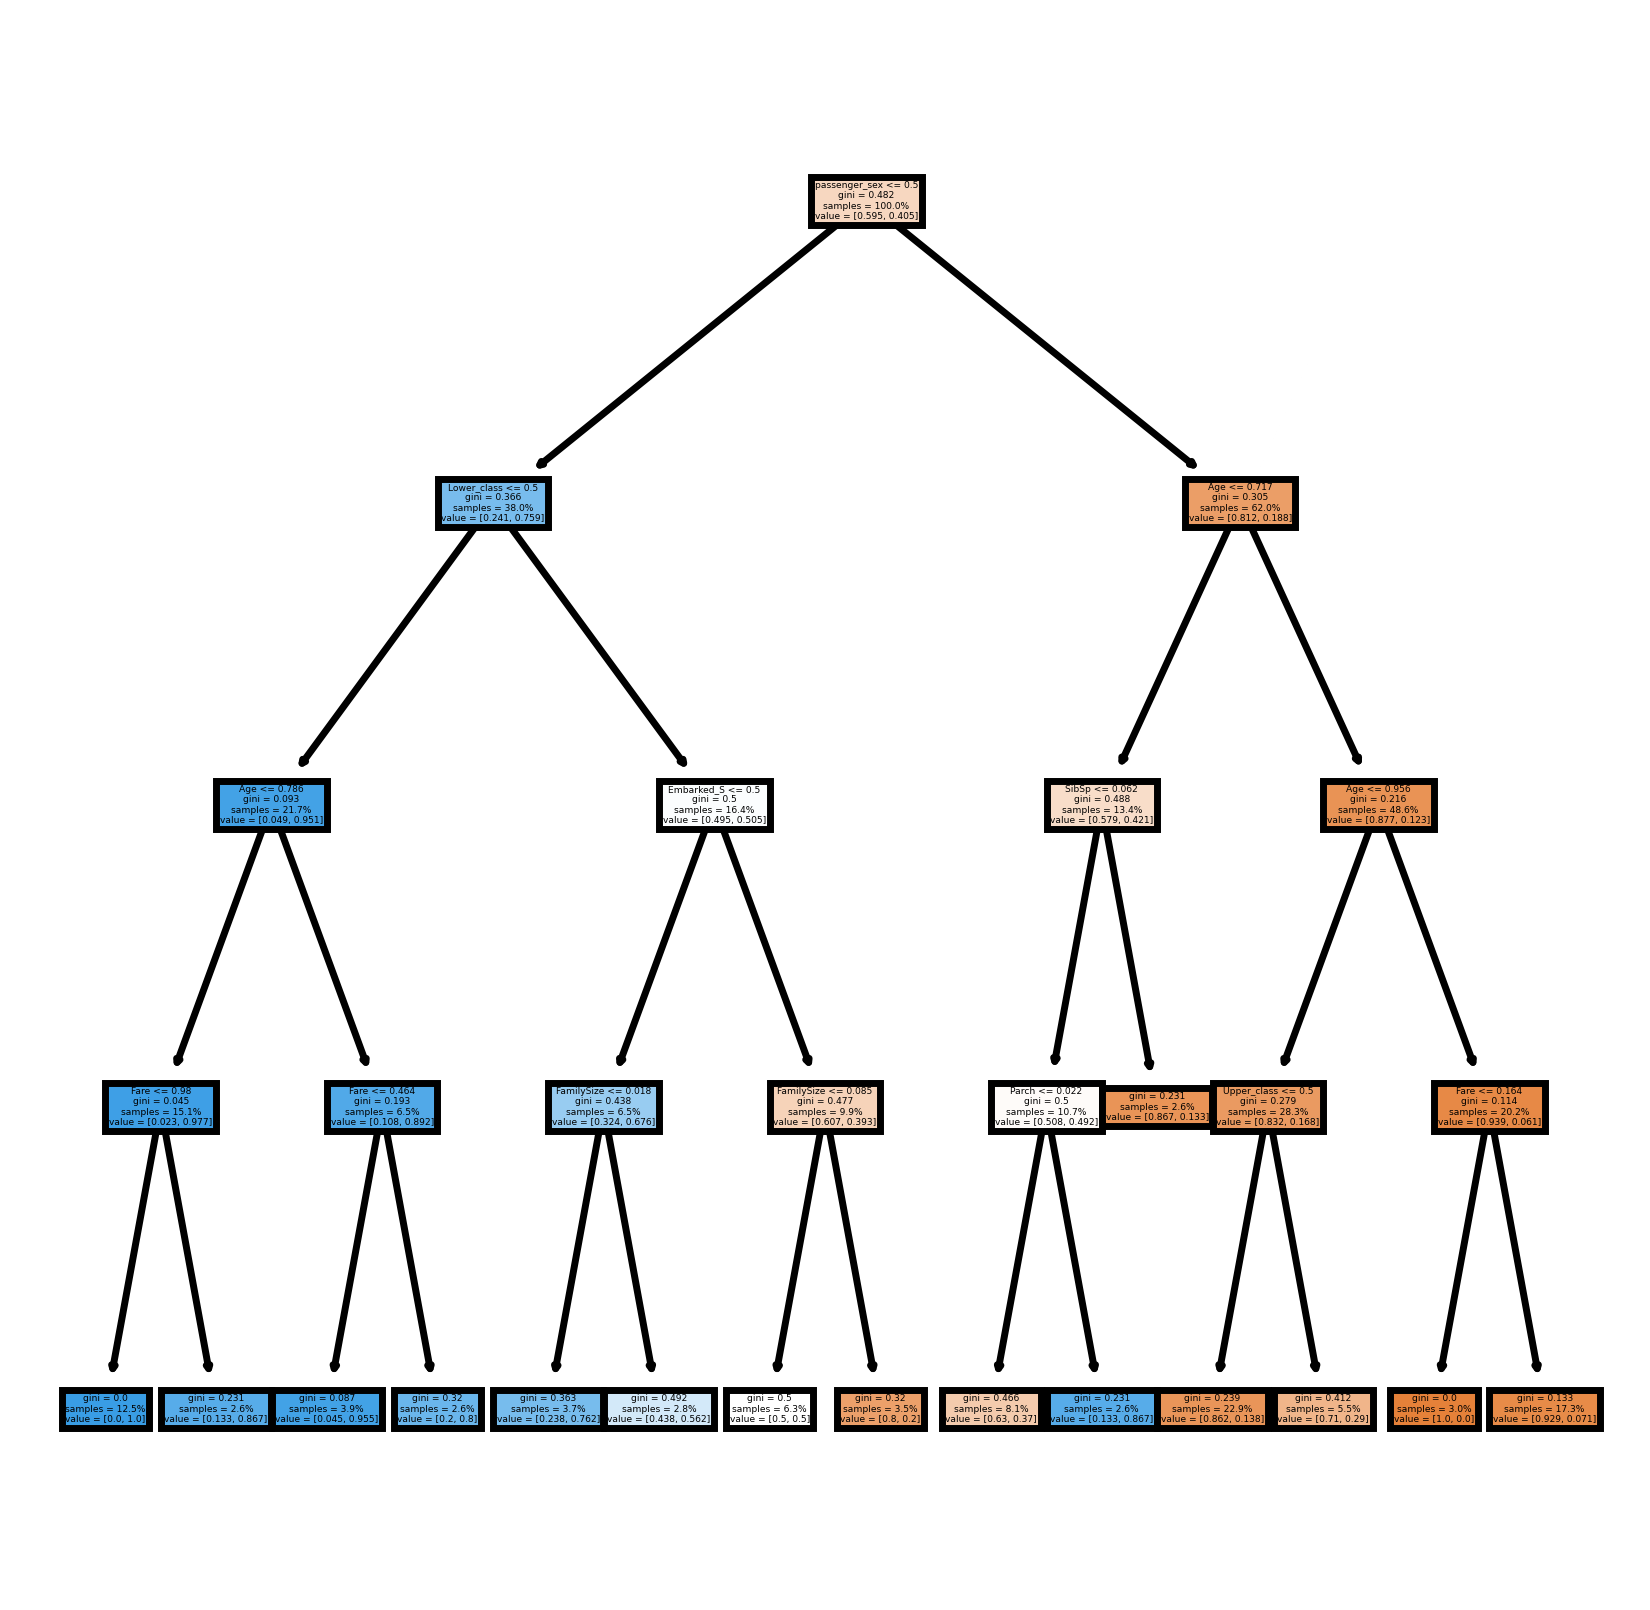

In [173]:
predict(2)

prediction: died
actual: died
logistic regression probability: 0.24941634180068334
Naive Bayes class 0: 8.200674297997769e-05
Naive Bayes class 1: 7.732040800790982e-06


0

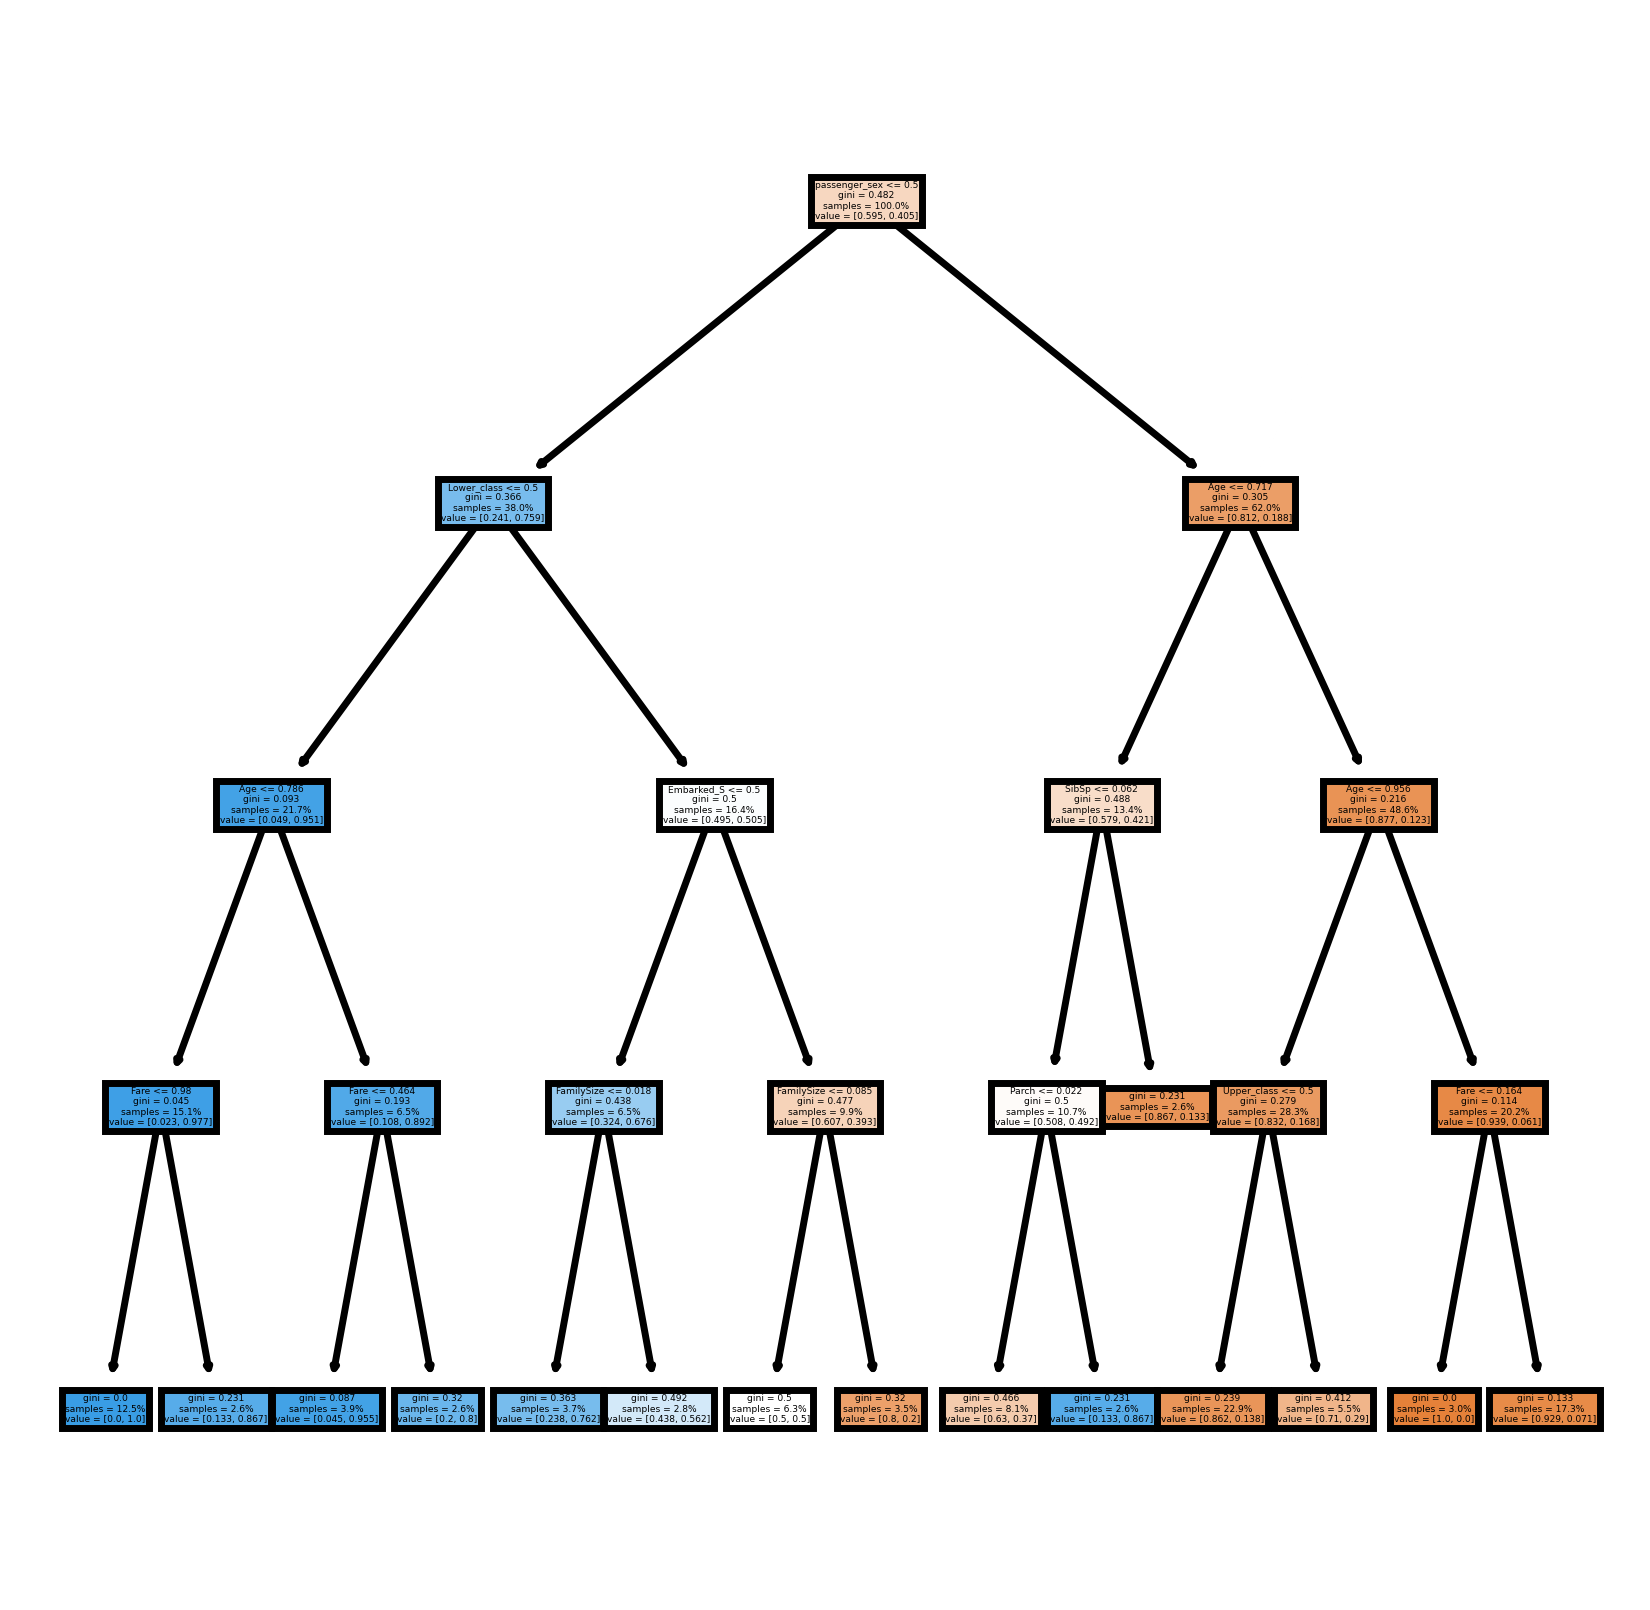

In [176]:
predict(10)

prediction: died
actual: died
logistic regression probability: 0.5633285044367761
Naive Bayes class 0: 1.4486110799257874e-06
Naive Bayes class 1: 7.215157443241242e-05


0

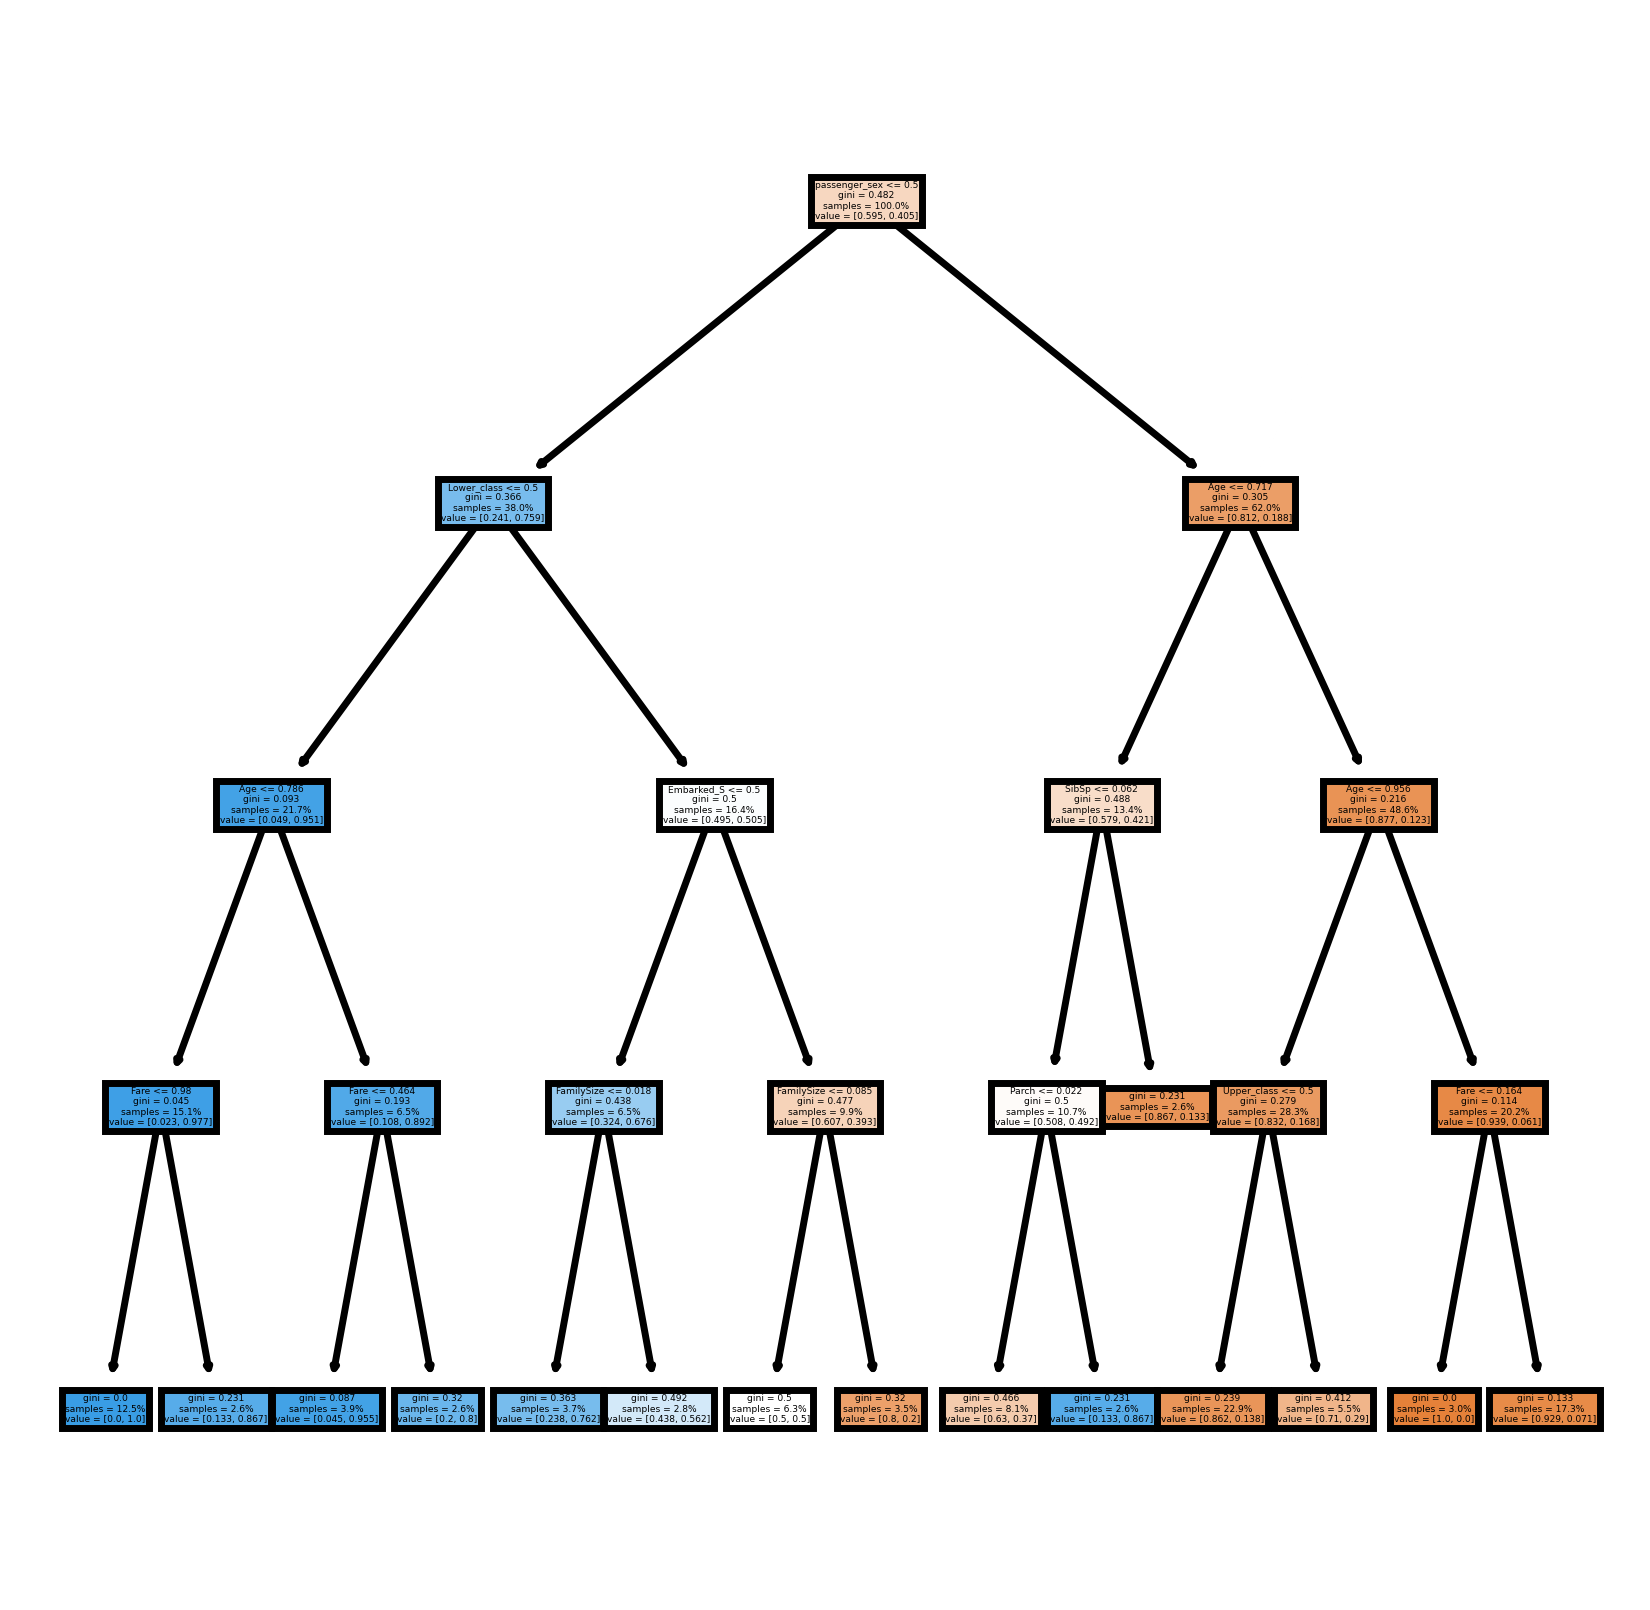

In [177]:
predict(15)

prediction: died
actual: died
logistic regression probability: 0.24926188149258566
Naive Bayes class 0: 8.072940361728241e-05
Naive Bayes class 1: 7.554786939821246e-06


0

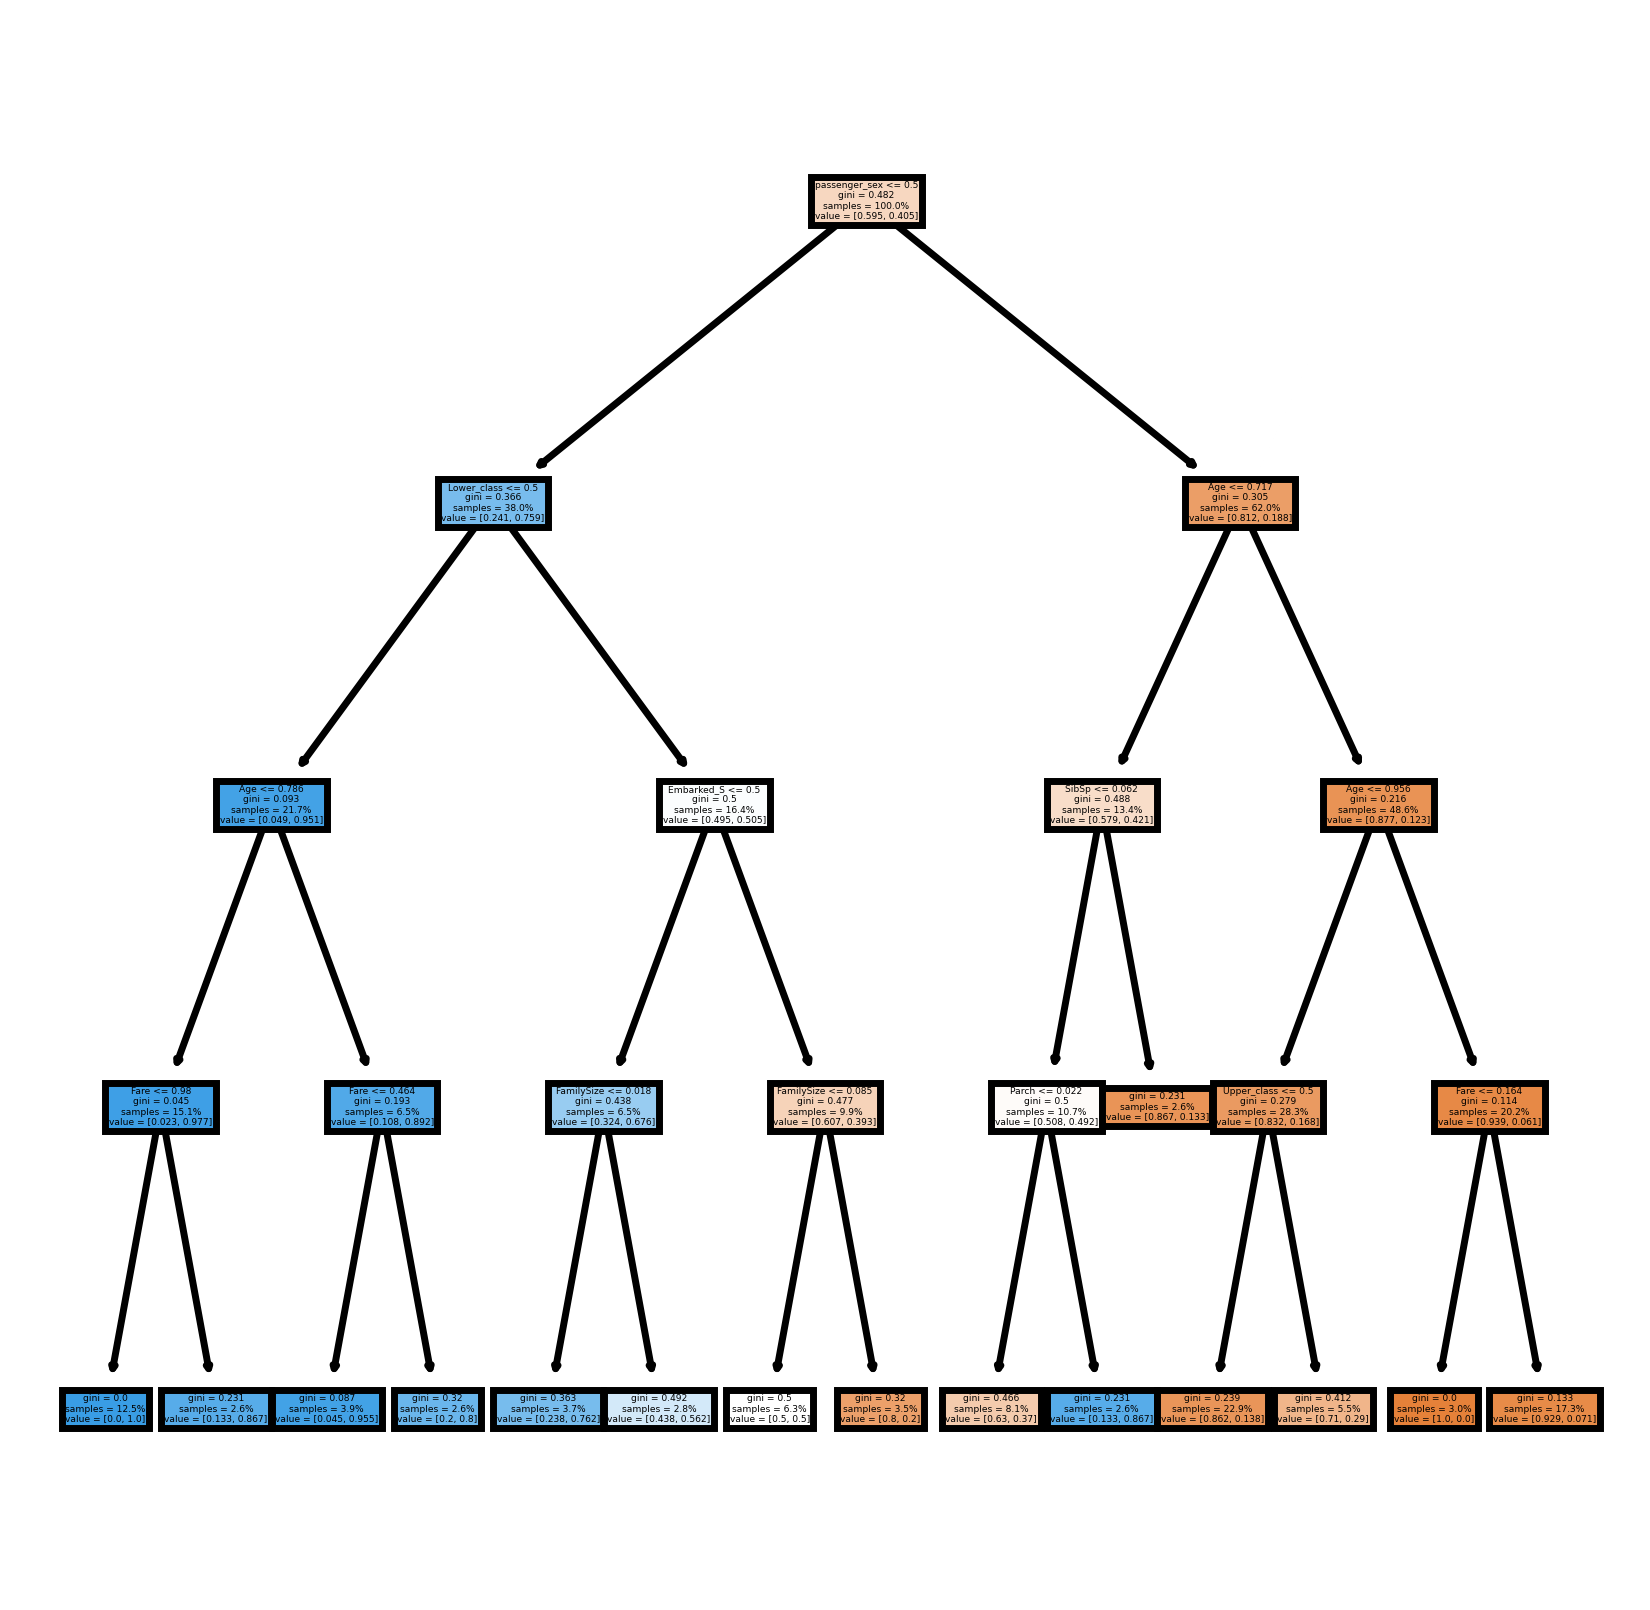

In [178]:
predict(100)

prediction: survived
actual: survived
logistic regression probability: 0.5248932860226156
Naive Bayes class 0: 1.8901339347374751e-06
Naive Bayes class 1: 5.765410580057521e-06


1

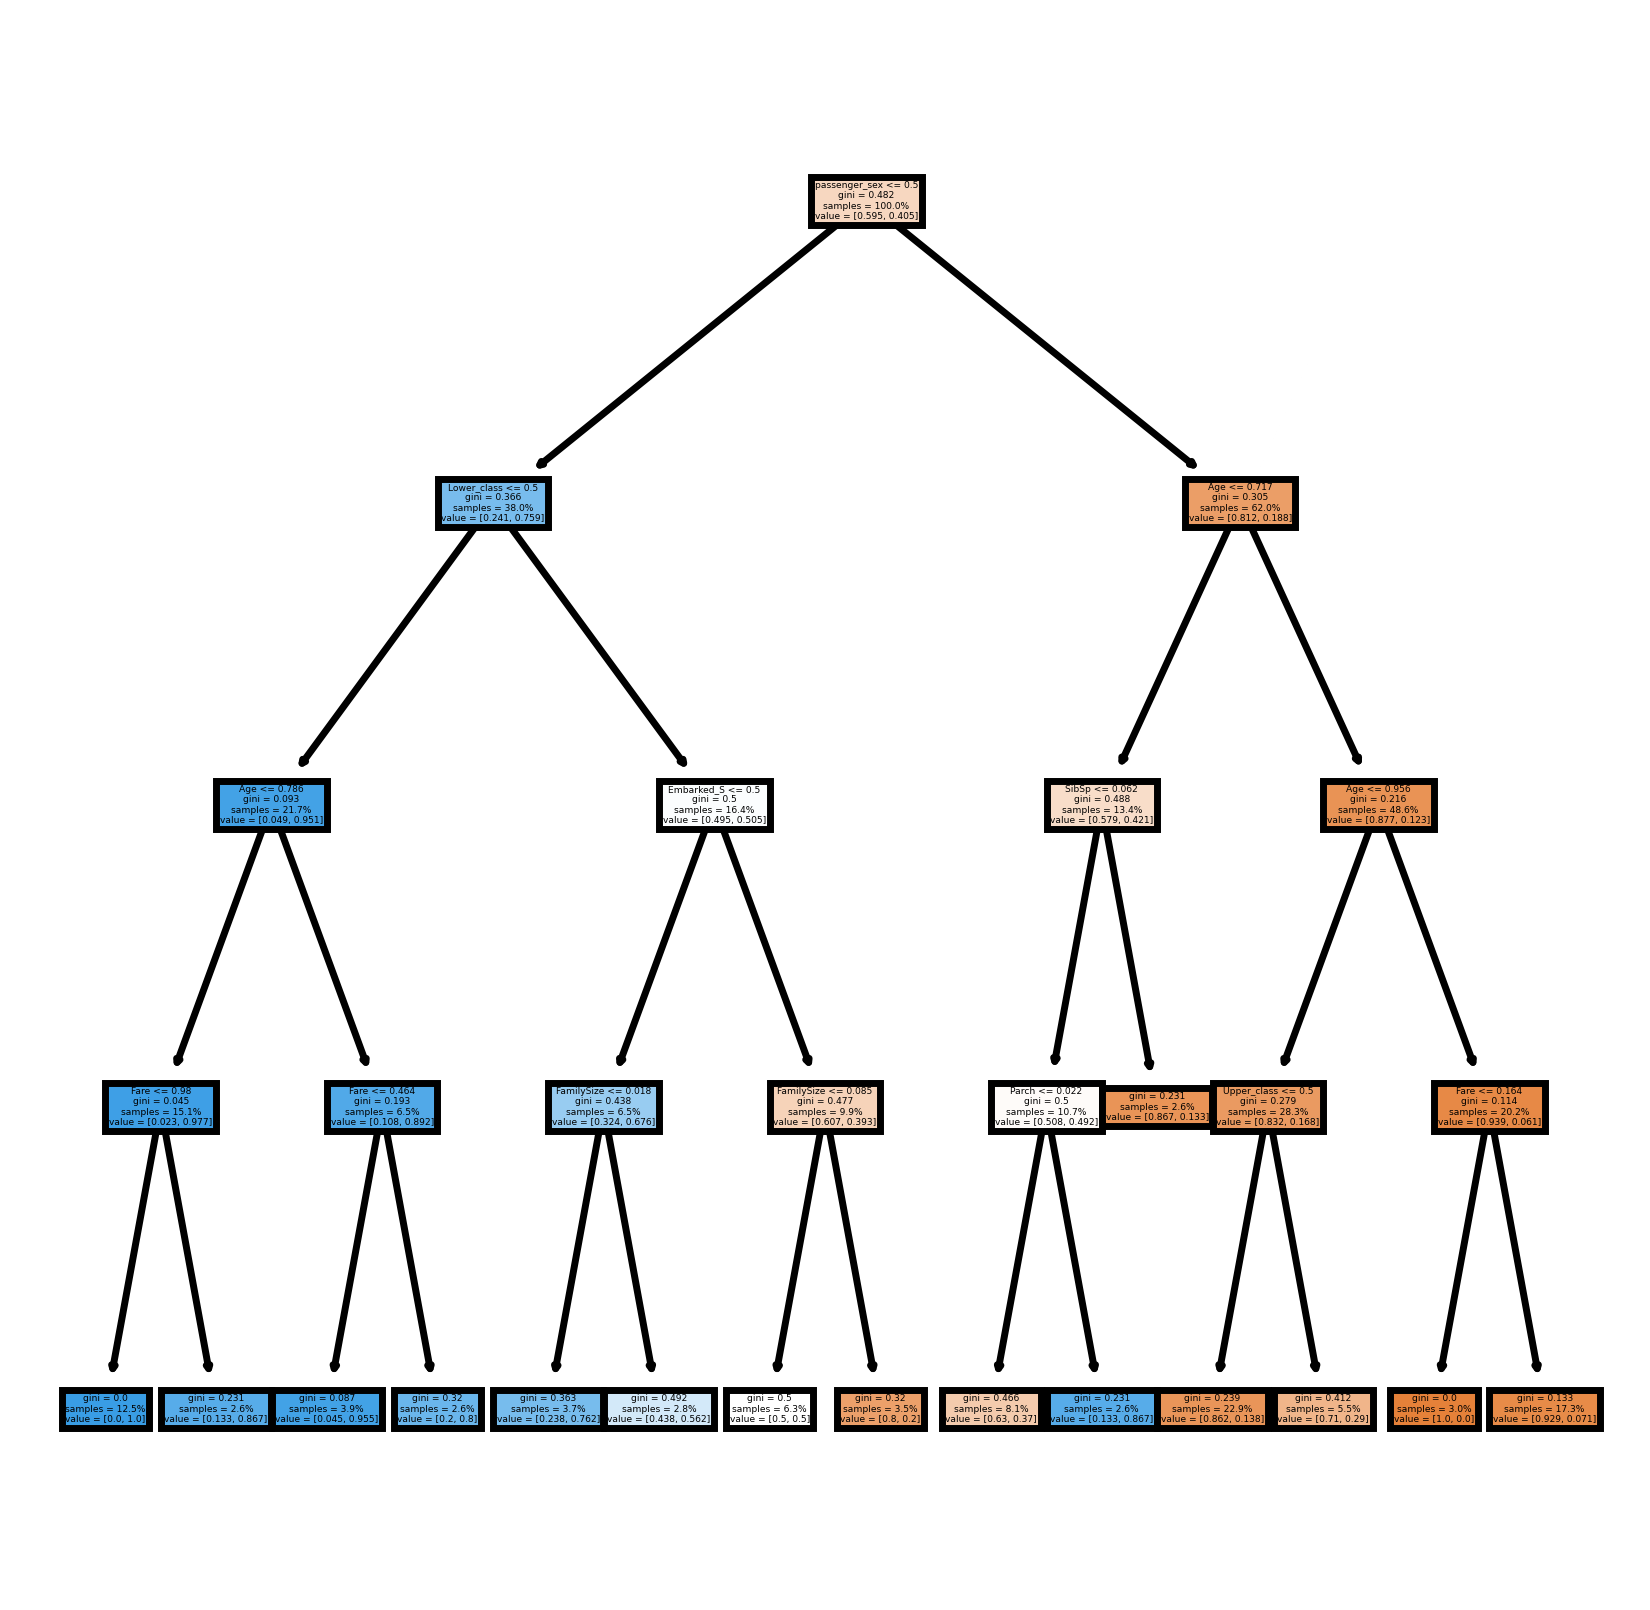

In [179]:
predict(125)

prediction: died
actual: died
logistic regression probability: 0.2493153815510269
Naive Bayes class 0: 0.0002678386524422166
Naive Bayes class 1: 2.9261556258183493e-05


0

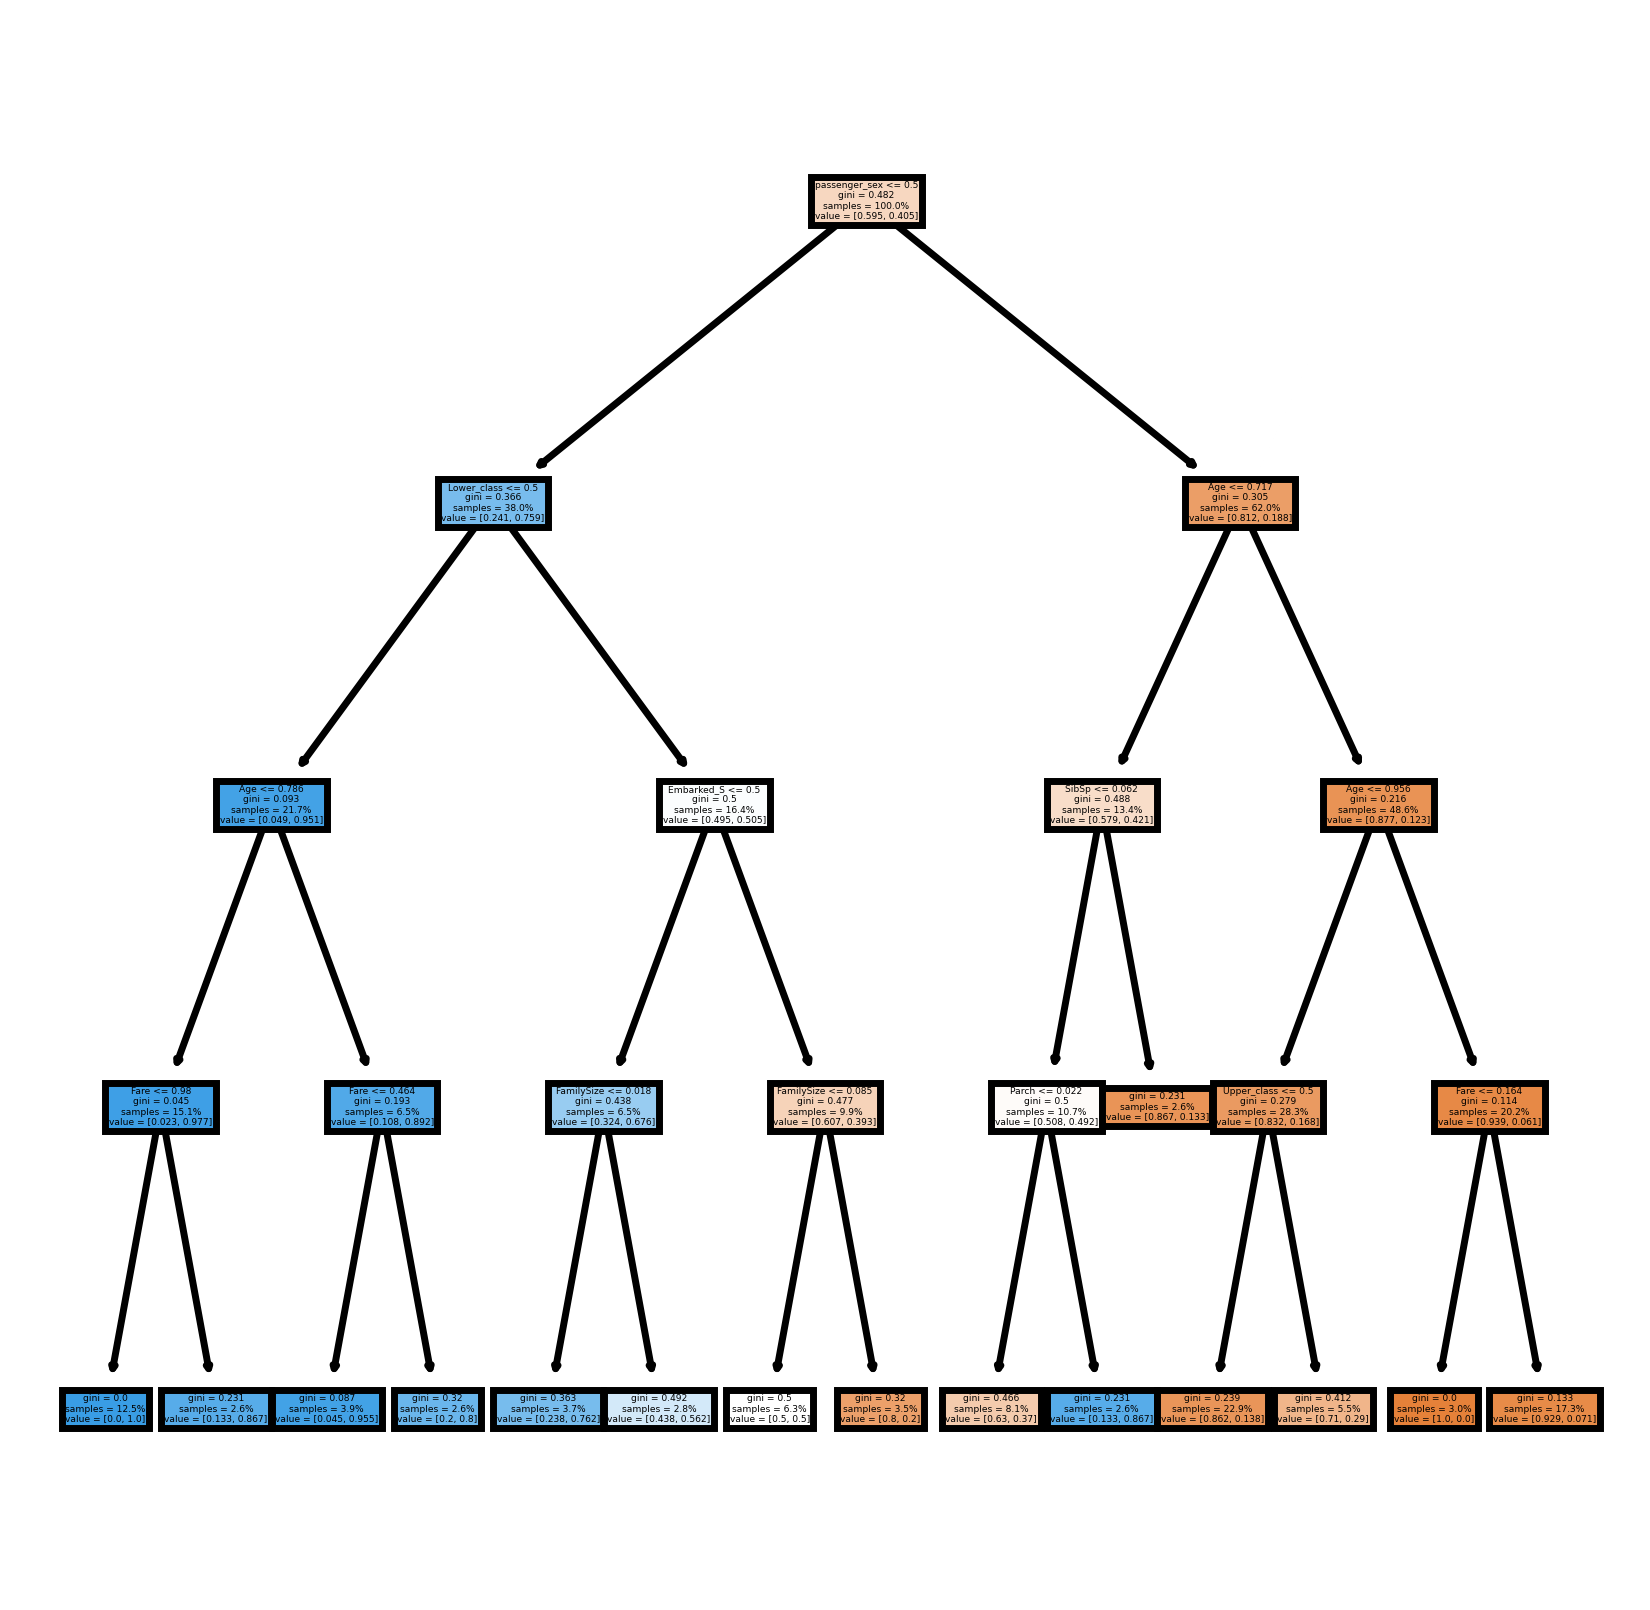

In [180]:
predict(156)

prediction: died
actual: died
logistic regression probability: 0.2599643880695001
Naive Bayes class 0: 0.00016443177058729537
Naive Bayes class 1: 3.163764358460016e-05


0

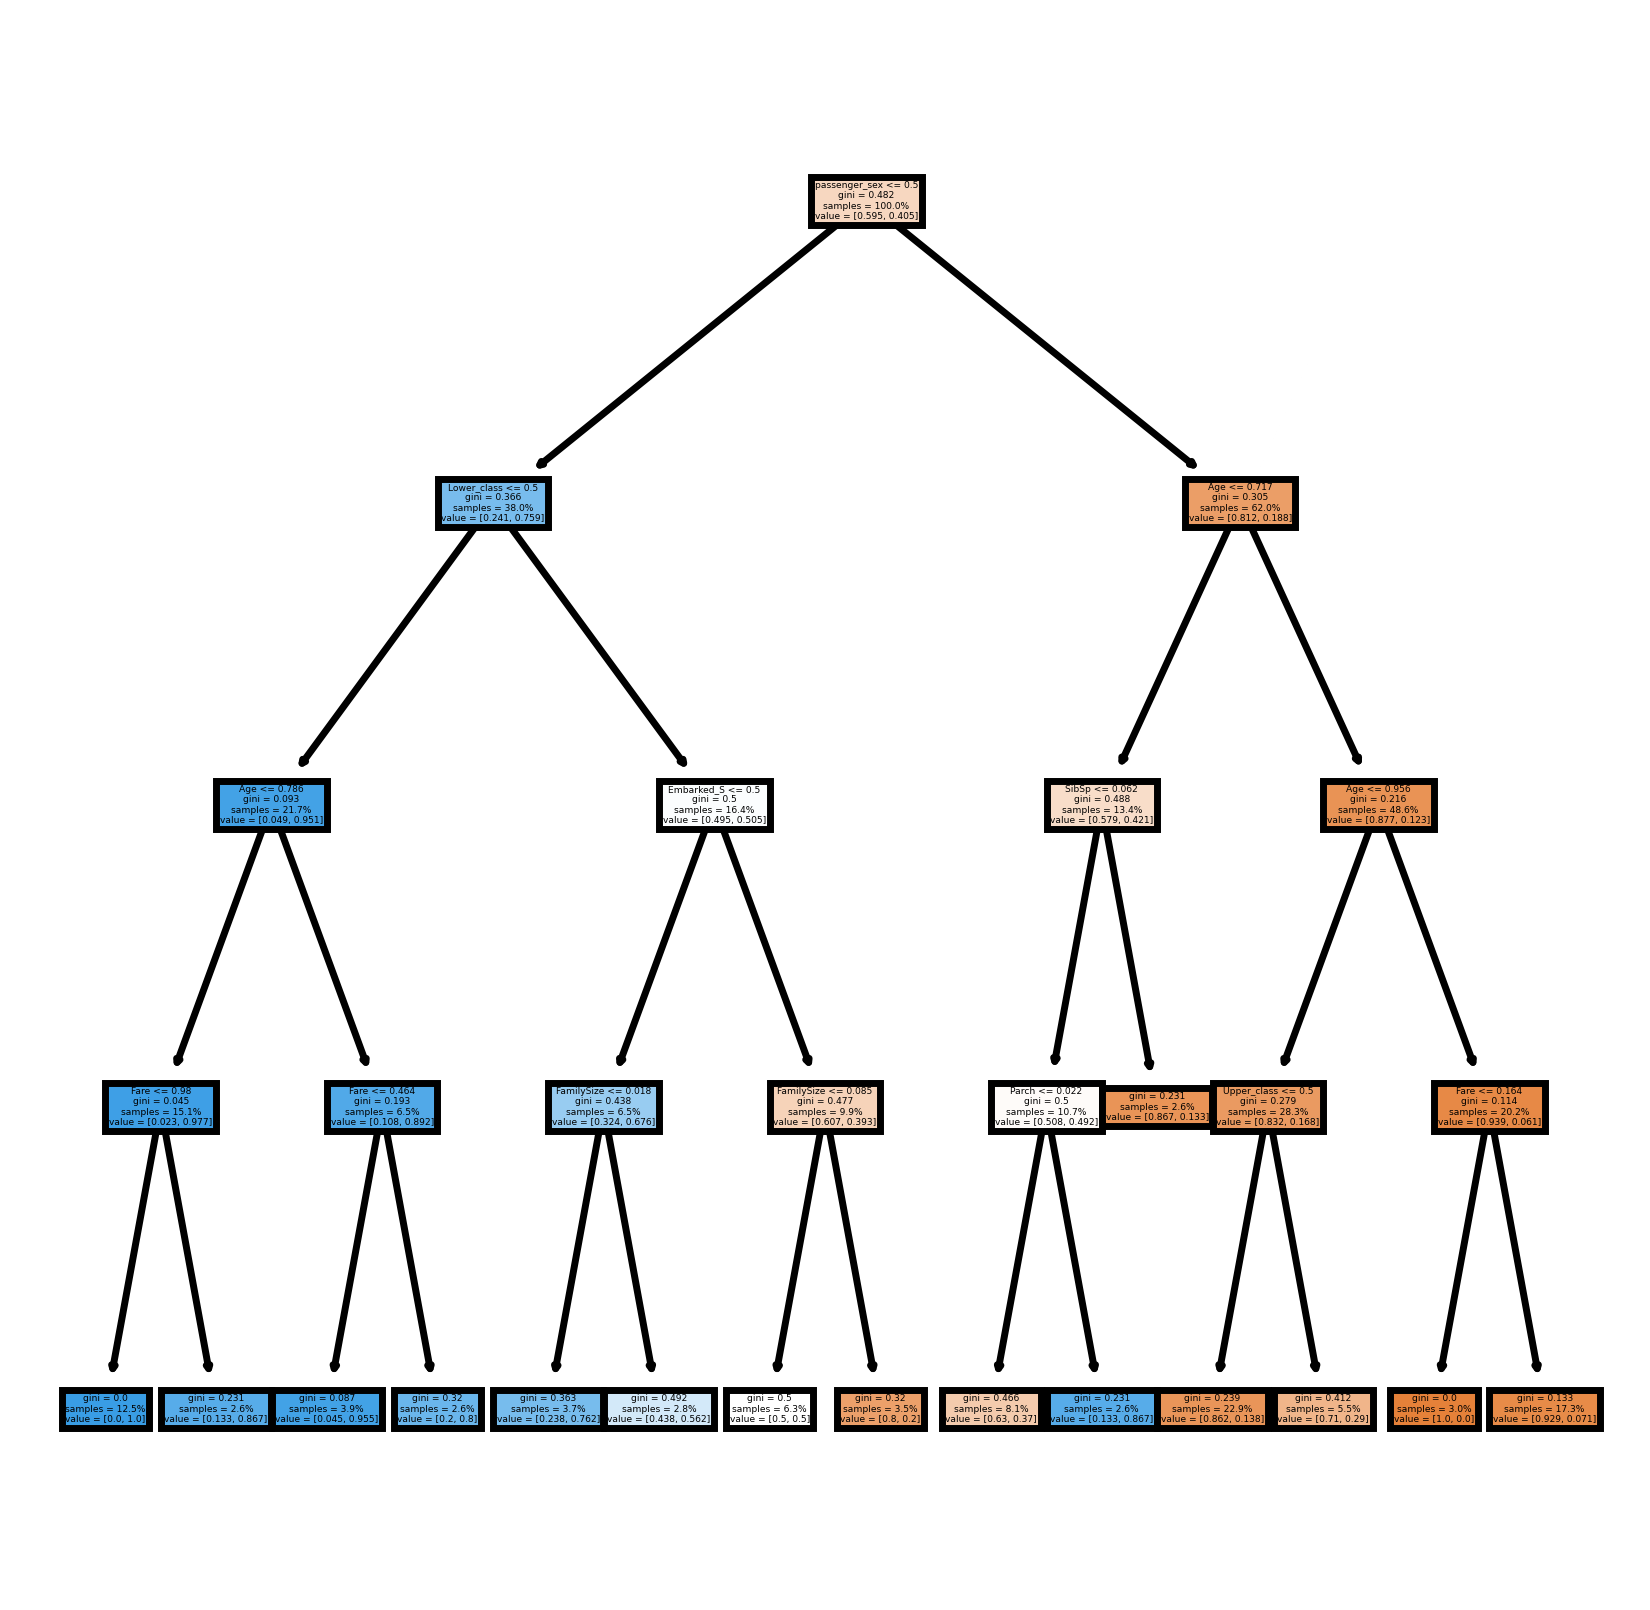

In [181]:
predict(12)

prediction: survived
actual: survived
logistic regression probability: 0.5201228287506804
Naive Bayes class 0: 5.063610274137036e-06
Naive Bayes class 1: 1.2510387734641874e-05


1

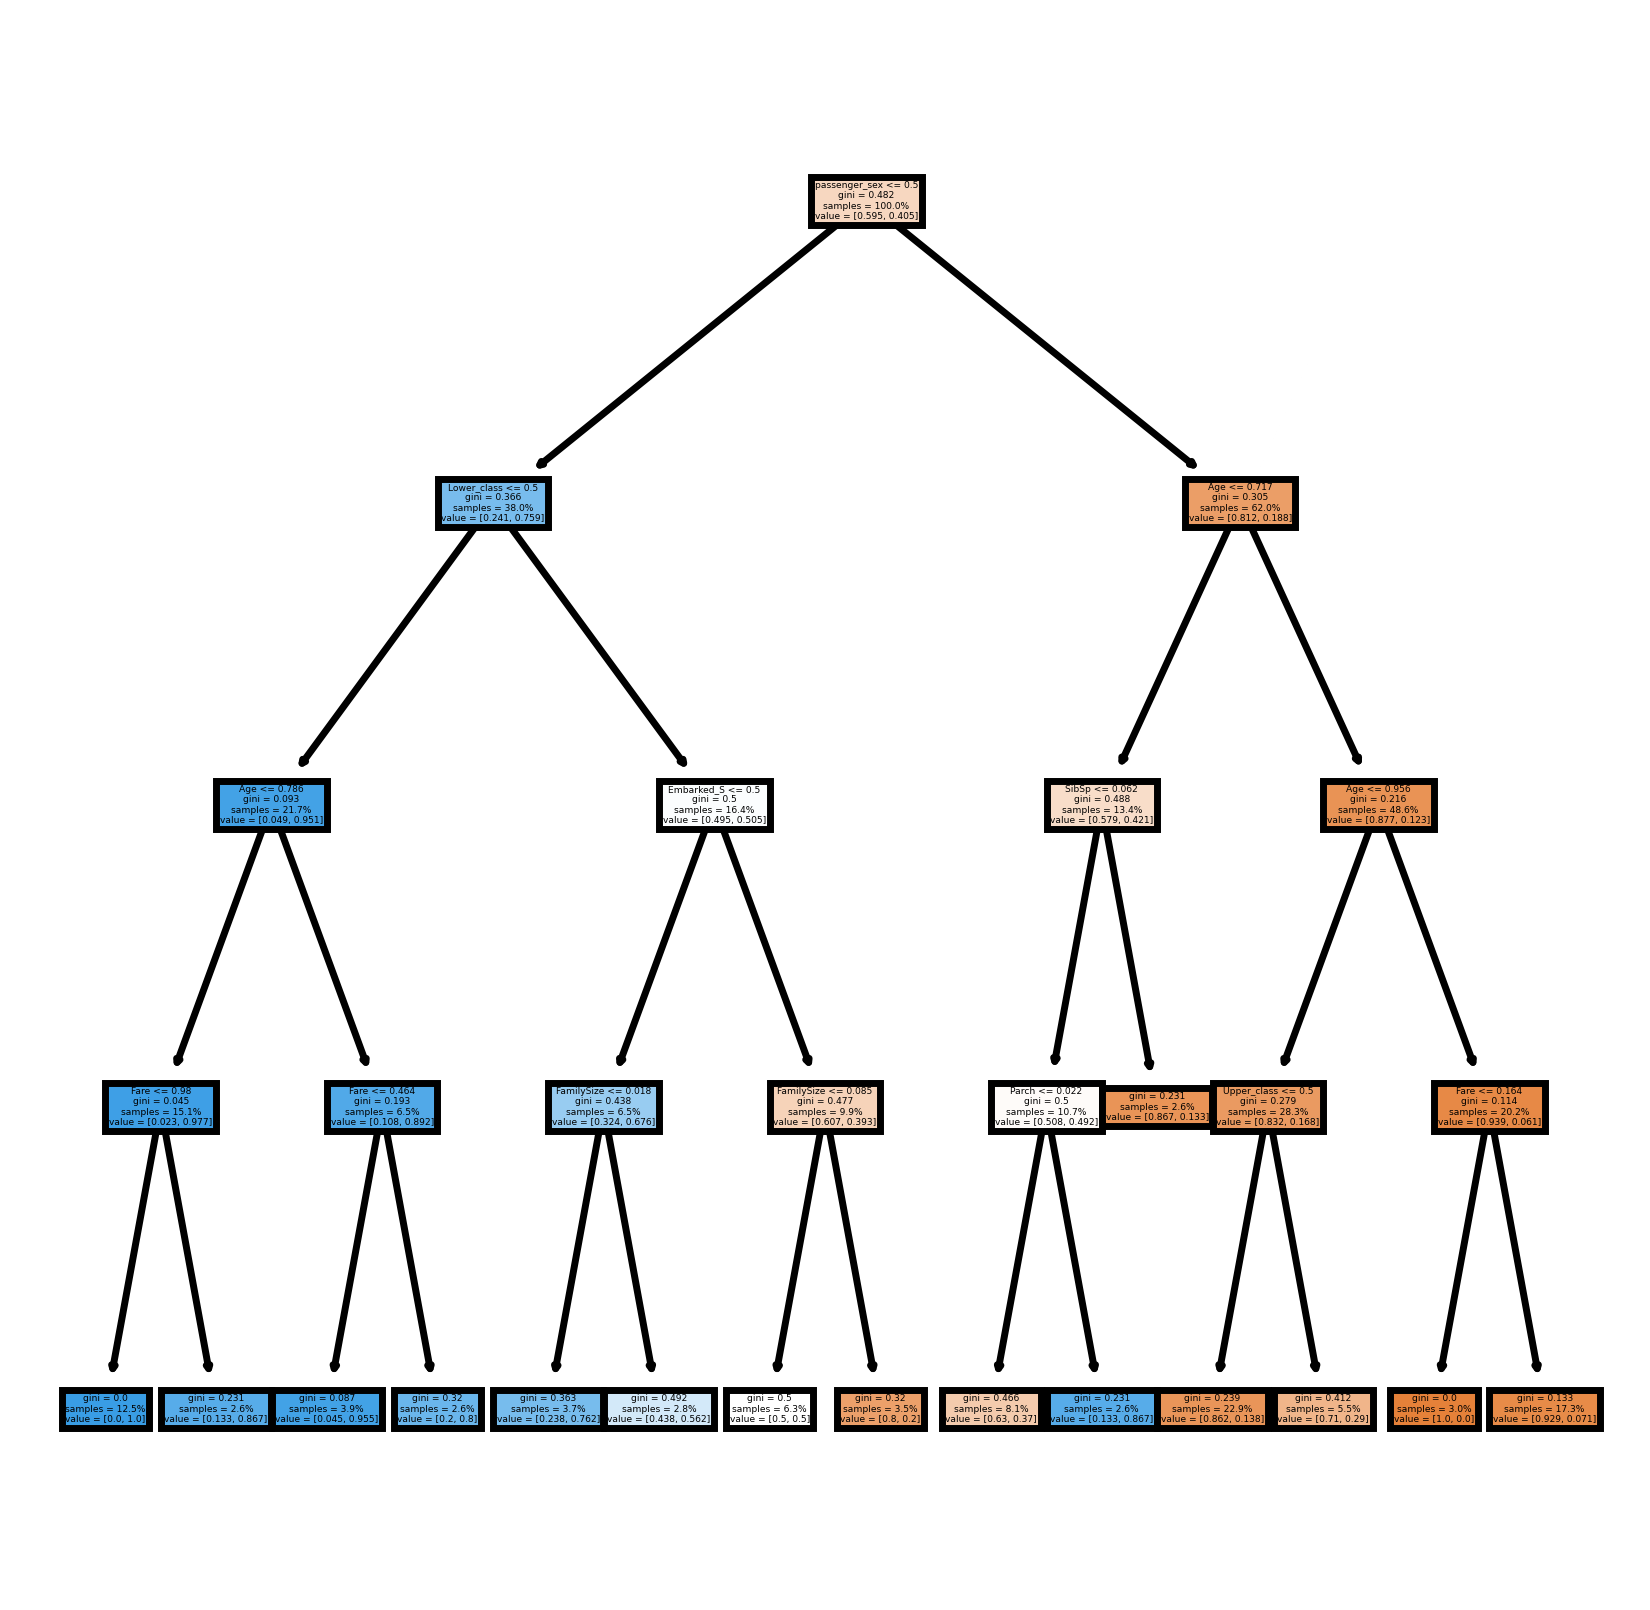

In [183]:
predict(28)